### Предсказание звонков в колл-центр

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загружаем данные

In [2]:
# train

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
webstat = pd.read_csv('t1_webstat.csv')

### Объедняем таблицы

In [3]:
df_target = pd.DataFrame(list(zip(data_train['id'], data_train['is_callcenter'])), columns = ['id', 'is_callcenter'])

col_to_use_train = list(data_train.columns.difference(webstat.columns))
col_to_use_train.append('sessionkey_id')

data_train = data_train[col_to_use_train].merge(webstat, how='left', on = 'sessionkey_id')

col_to_use_test = list(data_test.columns.difference(webstat.columns))
col_to_use_test.append('sessionkey_id')

data_test = data_test[col_to_use_test].merge(webstat, how='left', on = 'sessionkey_id')

### Работаем с датой 

In [4]:
data_train['create_time'] = pd.to_datetime(data_train['create_time'])
data_test['create_time'] = pd.to_datetime(data_test['create_time'])

data_train['day'] = data_train['create_time'].dt.day
data_train['month'] = data_train['create_time'].dt.month
data_train['year'] = data_train['create_time'].dt.year
data_train['hour'] = data_train['create_time'].dt.hour
data_train['dayofweek'] = data_train['create_time'].dt.dayofweek

data_test['day'] = data_test['create_time'].dt.day
data_test['month'] = data_test['create_time'].dt.month
data_test['year'] = data_test['create_time'].dt.year
data_test['hour'] = data_test['create_time'].dt.hour
data_test['dayofweek'] = data_test['create_time'].dt.dayofweek

# type to date
data_train['model_create_time'] = pd.to_datetime(data_train['model_create_time'])
data_test['model_create_time'] = pd.to_datetime(data_test['model_create_time'])

data_train['day_model'] = data_train['model_create_time'].dt.day
data_train['month_model'] = data_train['model_create_time'].dt.month
data_train['year_model'] = data_train['model_create_time'].dt.year
data_train['hour_model'] = data_train['model_create_time'].dt.hour
data_train['dayofweek_model'] = data_train['model_create_time'].dt.dayofweek

data_test['day_model'] = data_test['model_create_time'].dt.day
data_test['month_model'] = data_test['model_create_time'].dt.month
data_test['year_model'] = data_test['model_create_time'].dt.year
data_test['hour_model'] = data_test['model_create_time'].dt.hour
data_test['dayofweek_model'] = data_test['create_time'].dt.dayofweek

In [5]:
data_train = data_train.drop(['create_date', 'date_time'], axis=1)
data_test = data_test.drop(['create_date', 'date_time'], axis=1)

data_train.drop(['create_time'], inplace=True, axis=1)
data_test.drop(['create_time'], inplace=True, axis=1)

data_train.drop(['model_create_time'], inplace=True, axis=1)
data_test.drop(['model_create_time'], inplace=True, axis=1)

In [19]:
data_train['parent_id'].value_counts()

154     100447
133      89234
1328     85774
125      85161
1229     66983
         ...  
3726         1
2765         1
7608         1
6682         1
3340         1
Name: parent_id, Length: 368, dtype: int64

In [13]:
data_train[data_train['sessionkey_id'] == 123781654].nunique()

description_length        2
goods_qty                 2
id                        2
is_callcenter             1
is_moderated              1
parent_id                 2
pics_qty                  1
rating_count              1
rating_value              1
root_id                   2
utm_medium                1
utm_source                1
sessionkey_id             1
page_type                 6
pageview_number          28
pageview_duration_sec    21
category_id               2
model_id                  8
good_id                   8
price                     8
product_in_sale           1
day                       1
month                     1
year                      1
hour                      1
dayofweek                 1
day_model                 2
month_model               2
year_model                2
hour_model                2
dayofweek_model           2
dtype: int64

In [ ]:
data_train = data_train.groupby('id').median()
data_train.drop('is_callcenter', axis=1, inplace=True)
data_train.reset_index(level=0, inplace=True)

data_train = data_train.merge(df_target, how='left', on='id')
data_train.drop('id', axis=1, inplace=True)

data_test = data_test.groupby('id').median()

data_test.reset_index(level=0, inplace=True)
y_id = data_test.id
data_test.drop('id', axis=1, inplace=True)

In [7]:
columns_train = data_train.columns

### Посмотрим на таблицы

In [8]:
data_train.head()

,description_length,goods_qty,is_moderated,parent_id,pics_qty,rating_count,rating_value,root_id,utm_medium,utm_source,...,month,year,hour,dayofweek,day_model,month_model,year_model,hour_model,dayofweek_model,is_callcenter
0,0,1,1,2844,1,0.0,NaN,1504,5,13.0,...,11,1975,9,5,31.0,7.0,1975.0,3.0,3.0,0
1,169,12,1,1213,2,2.0,5.0,1183,1,2.0,...,11,1975,9,5,14.0,4.0,1972.0,18.0,4.0,0
2,1921,2,1,4448,1,1.0,NaN,255,2,NaN,...,11,1975,9,5,22.0,8.0,1975.0,14.0,4.0,0
3,382,5,1,2646,1,0.0,NaN,1183,1,2.0,...,11,1975,9,5,25.0,11.0,1974.0,15.0,0.0,0
4,926,24,1,1212,16,12.0,4.0,1183,1,2.0,...,11,1975,9,5,6.0,10.0,1971.0,16.0,2.0,0


In [9]:
data_test.head()

,description_length,goods_qty,is_moderated,parent_id,pics_qty,rating_count,rating_value,root_id,utm_medium,utm_source,...,day,month,year,hour,dayofweek,day_model,month_model,year_model,hour_model,dayofweek_model
0,1520,95,1,5674,6,0.0,NaN,1183,7,11.0,...,1,2,1976,9,6,10.0,3.0,1975.0,22.0,6
1,68,3,1,2342,3,NaN,NaN,1634,4,2.0,...,1,2,1976,9,6,29.0,11.0,1973.0,13.0,6
2,861,5,1,154,1,0.0,NaN,153,5,20.0,...,1,2,1976,9,6,18.0,1.0,1972.0,21.0,6
3,861,5,1,154,1,0.0,NaN,153,5,20.0,...,1,2,1976,9,6,18.0,1.0,1972.0,21.0,6
4,0,1,1,5675,2,NaN,NaN,1183,4,1.0,...,1,2,1976,9,6,18.0,12.0,1975.0,22.0,6


### Посмотрим на пропуски и на то, как они распределены

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104595 entries, 0 to 104594
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   description_length     104595 non-null  int64  
 1   goods_qty              104595 non-null  int64  
 2   is_moderated           104595 non-null  int64  
 3   parent_id              104595 non-null  int64  
 4   pics_qty               104595 non-null  int64  
 5   rating_count           51613 non-null   float64
 6   rating_value           33741 non-null   float64
 7   root_id                104595 non-null  int64  
 8   utm_medium             104595 non-null  int64  
 9   utm_source             94145 non-null   float64
 10  sessionkey_id          104595 non-null  int64  
 11  page_type              103971 non-null  float64
 12  pageview_number        103971 non-null  float64
 13  pageview_duration_sec  93914 non-null   float64
 14  category_id            102081 non-nu

In [11]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17196 entries, 0 to 17195
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   description_length     17196 non-null  int64  
 1   goods_qty              17196 non-null  int64  
 2   is_moderated           17196 non-null  int64  
 3   parent_id              17196 non-null  int64  
 4   pics_qty               17196 non-null  int64  
 5   rating_count           7919 non-null   float64
 6   rating_value           5162 non-null   float64
 7   root_id                17196 non-null  int64  
 8   utm_medium             17196 non-null  int64  
 9   utm_source             15653 non-null  float64
 10  sessionkey_id          17196 non-null  int64  
 11  page_type              17041 non-null  float64
 12  pageview_number        17041 non-null  float64
 13  pageview_duration_sec  15476 non-null  float64
 14  category_id            16492 non-null  float64
 15  mo

Много пропусков в рейтингах: значений заполнено всего примерно 32%, а количество рейтингов на 50%.

Посмотрим на распределение пропусков

<AxesSubplot:>

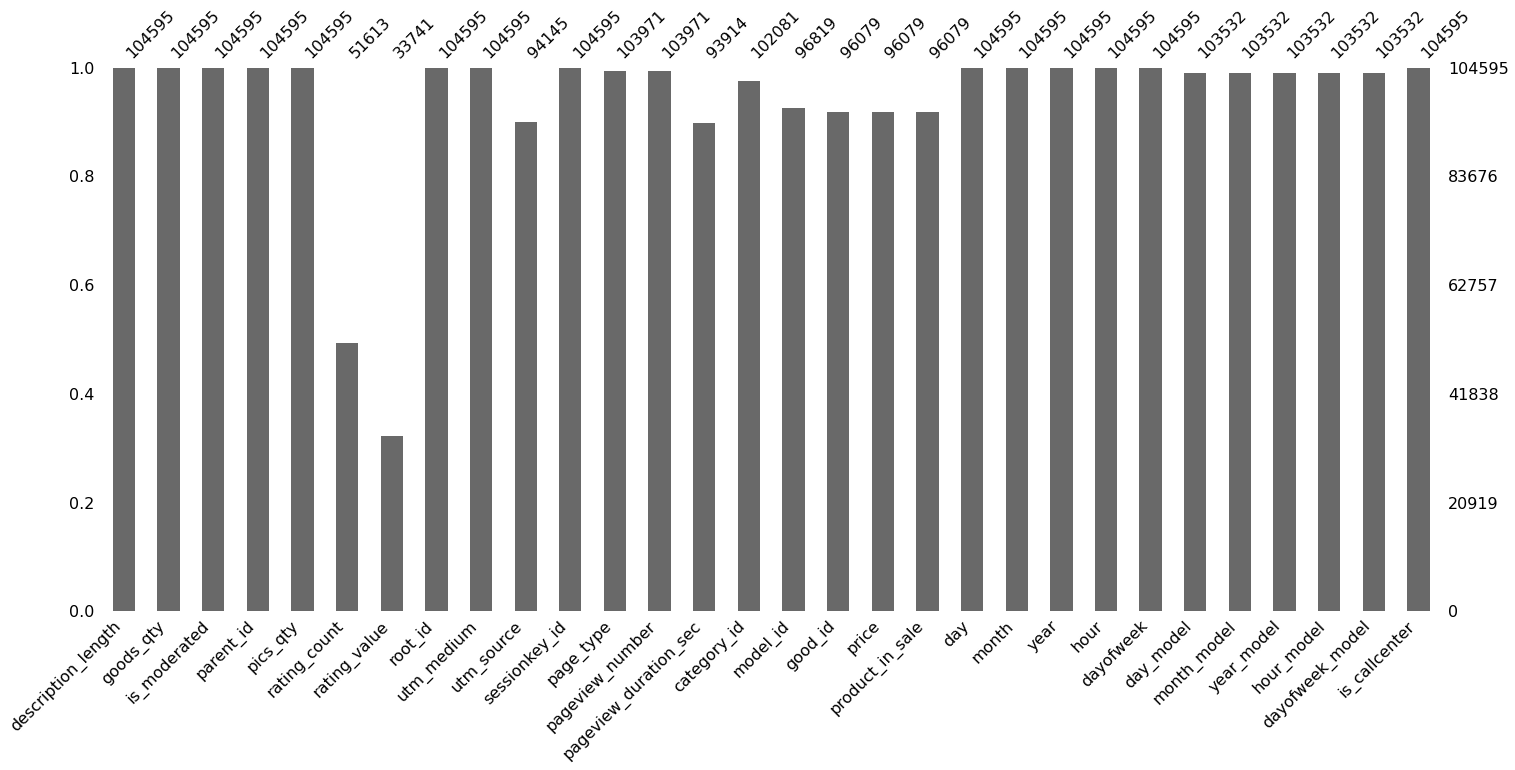

In [15]:
import missingno as msno

msno.bar(data_train)

<AxesSubplot:>

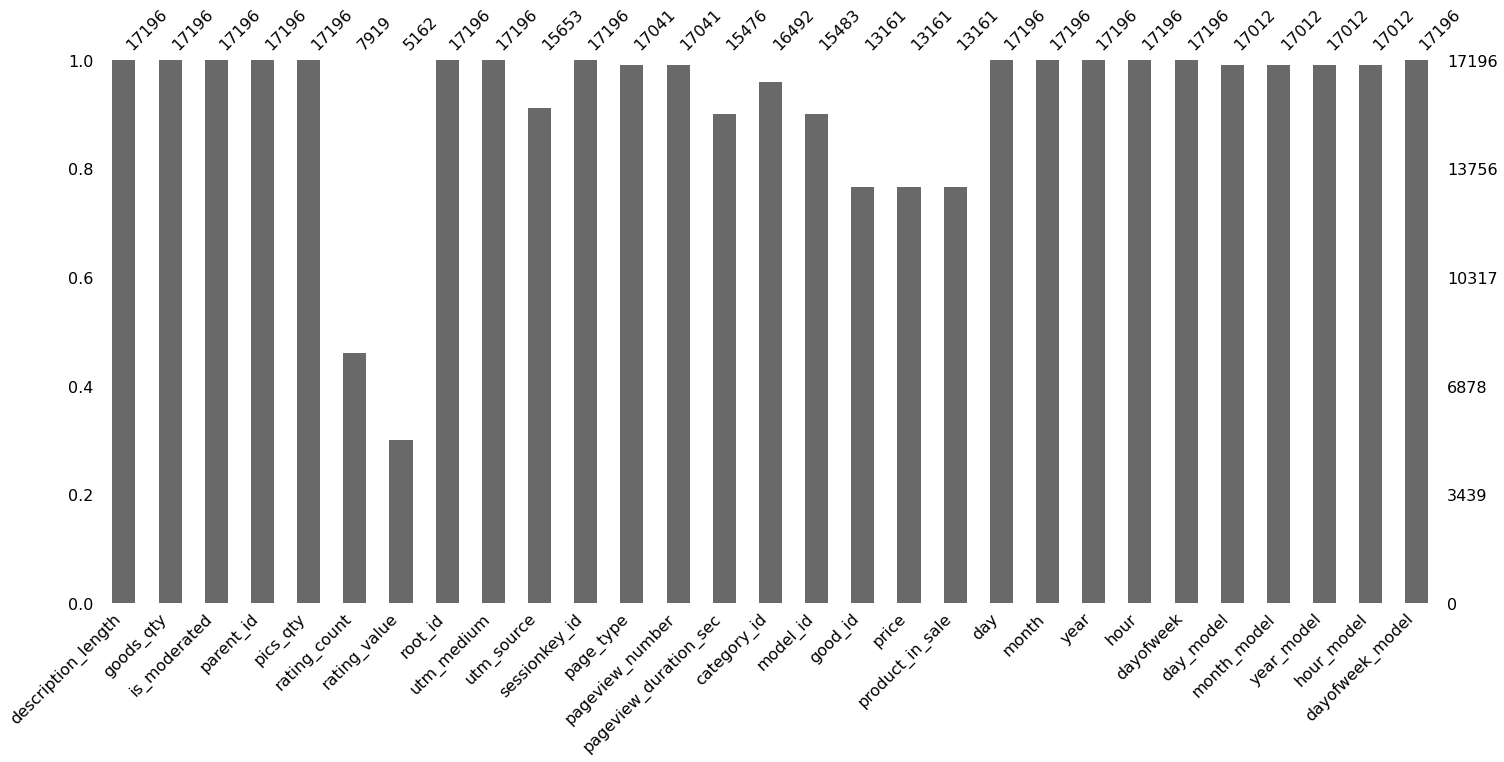

In [16]:
msno.bar(data_test)

Видно, что столбцы с рейтингами сильно проседают

### Рассмотрим подробно все столбцы

### Соотношение классов

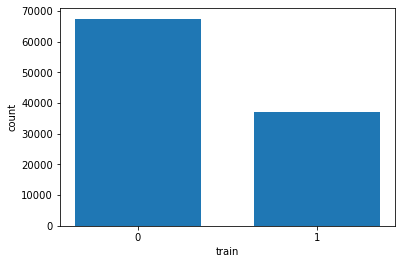

In [10]:
# ditribution of target

plt.hist(data_train['is_callcenter'], bins=2, rwidth=0.7)
plt.xlabel('train')
plt.ylabel('count')
plt.xticks([0.25, 0.75], labels=[0, 1])
plt.show()

In [11]:
print('Соотношение классов', data_train.groupby(['is_callcenter']).count().iloc[1, 0]/data_train.shape[0] * 100, '%')

Соотношение классов 35.46919068789139 %


### Цена 

In [12]:
data_train['price'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count     96079.000000
mean       1835.324322
std        3604.444231
min           1.000000
1%           61.000000
5%          175.000000
10%         264.000000
25%         520.000000
50%        1067.000000
75%        2229.000000
90%        4265.200000
95%        5828.750000
99%        9937.830000
max      828041.000000
Name: price, dtype: float64

### Посмотрим на распределение признака на трейне и тесте

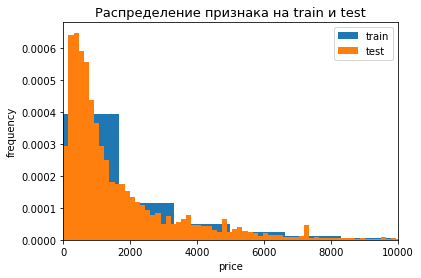

In [15]:
# ditribution of price 

plt.hist(data_train['price'], bins=500, label='train', density=True)
plt.hist(data_test['price'], bins=500, label='test', density=True)
plt.xlim(0, 10000)
plt.xlabel('price')
plt.ylabel('frequency')
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

Распределение цены на трейне и тесте в целом схоже, однако, видно, что в тесте есть пик товаров с ценой примерно до 10000.

### Посмотрим на зависимость среднего значения таргета от цены 

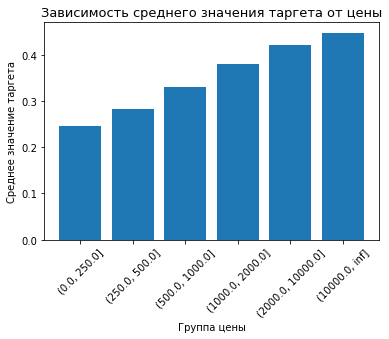

In [16]:
data_train['price_bucket'] = pd.cut(data_train['price'], 
                                    [0, 250, 500, 1000, 2000, 10000, float('Inf')])
price_target_dep = data_train.groupby('price_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа цены')
plt.title('Зависимость среднего значения таргета от цены', fontsize=13)
plt.show()

In [17]:
data_train.groupby('price_bucket')['is_callcenter'].value_counts()

price_bucket       is_callcenter
(0.0, 250.0]       0                 6446
                   1                 2106
(250.0, 500.0]     0                10259
                   1                 4041
(500.0, 1000.0]    0                15264
                   1                 7513
(1000.0, 2000.0]   0                14152
                   1                 8717
(2000.0, 10000.0]  0                15422
                   1                11213
(10000.0, inf]     0                  522
                   1                  424
Name: is_callcenter, dtype: int64

Судя по распределению по бакетам, цена является информативной фичой: среднее значение таргета довольно сильно меняется в зависимости от бакета. Прослеживается линейная зависимость.

### Произведем схожий анализ других признаков

### ID товара

In [18]:
data_train['good_id'].nunique()

55919

In [19]:
data_train['good_id'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    9.607900e+04
mean     5.038378e+07
std      1.773713e+07
min      2.162020e+05
1%       3.369602e+06
5%       1.866044e+07
10%      2.331243e+07
25%      3.473880e+07
50%      5.851260e+07
75%      6.372856e+07
90%      6.750462e+07
95%      6.916664e+07
99%      7.215550e+07
max      7.535804e+07
Name: good_id, dtype: float64

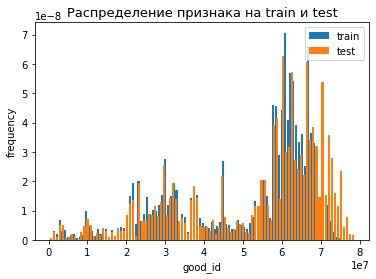

In [30]:
# distribution of good_id

plt.hist(data_train['good_id'], bins=100, rwidth=0.7, label='train', density=True)
plt.hist(data_test['good_id'], bins=100, rwidth=0.7, label='test', density=True)
plt.xlabel('good_id')
plt.ylabel('frequency')
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

Уникальных значений очень много, так что признак неинформативный, распределение на трейне и тесте схоже.
Посмотрим, не упорядочены ли искусственно данные по id.

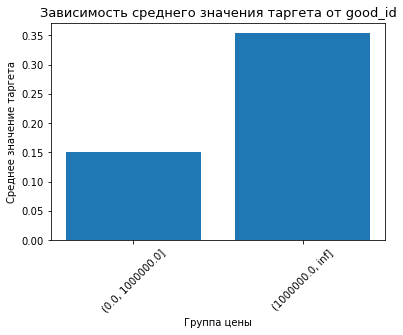

In [21]:
data_train['good_id_bucket'] = pd.cut(data_train['good_id'], 
                                    [0, 10**6, float('Inf')])
price_target_dep = data_train.groupby('good_id_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа цены')
plt.title('Зависимость среднего значения таргета от good_id', fontsize=13)
plt.show()

Из графика видно, что есть разрыв в среднем значении тагрета, однако это не очень репрезентативно, так как количество значений в первом столбце мало.

### utm_medium

In [22]:
data_train['utm_medium'].value_counts()

1    47804
2    15714
5    14025
4    12724
6     8627
7     3178
3     2270
8      253
Name: utm_medium, dtype: int64

In [23]:
data_train['utm_medium'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    104595.000000
mean          2.706583
std           1.959407
min           1.000000
1%            1.000000
5%            1.000000
10%           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
90%           6.000000
95%           6.000000
99%           7.000000
max           8.000000
Name: utm_medium, dtype: float64

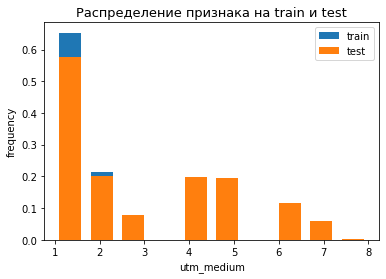

In [29]:
# distribution of utm_source

plt.hist(data_train['utm_medium'], bins=10, rwidth=0.7, label='train', density=True)
plt.hist(data_test['utm_medium'], bins=10, rwidth=0.7, label='test', density=True)
plt.xlabel('utm_medium')
plt.ylabel('frequency')
plt.title('Зависимость utm_medium таргета от цены', fontsize=13)
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

Видно, что есть пик в utm_medium = 1

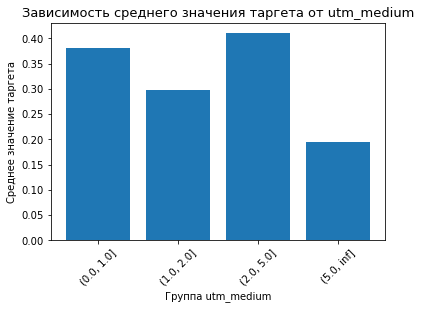

In [25]:
data_train['utm_medium_bucket'] = pd.cut(data_train['utm_medium'], 
                                    [0, 1, 2, 5, float('Inf')])
price_target_dep = data_train.groupby('utm_medium_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа utm_medium')
plt.title('Зависимость среднего значения таргета от utm_medium', fontsize=13)
plt.show()

Судя по распределению по бакетам, utm_medium является информативной фичой: среднее значение таргета довольно сильно меняется в зависимости от бакета.

### utm_source

In [31]:
data_train['utm_source'].value_counts()

1.0      44801
2.0      13683
4.0       5083
8.0       4006
3.0       3932
         ...  
360.0        1
116.0        1
250.0        1
295.0        1
555.0        1
Name: utm_source, Length: 288, dtype: int64

In [32]:
data_train['utm_source'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    94145.000000
mean         7.556238
std         18.983731
min          1.000000
1%           1.000000
5%           1.000000
10%          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
90%         23.000000
95%         32.000000
99%         60.000000
max        555.000000
Name: utm_source, dtype: float64

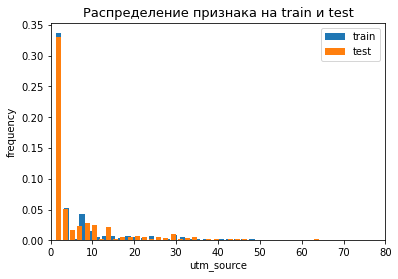

In [34]:
# distribution of utm_source

plt.hist(data_train['utm_source'], bins=300, rwidth=0.7, label='train', density=True)
plt.hist(data_test['utm_source'], bins=300, rwidth=0.7, label='test', density=True)
plt.xlabel('utm_source')
plt.ylabel('frequency')
plt.xlim(0, 80)
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

Судя по распределению, есть значительный пик при значениях близких к нулю.

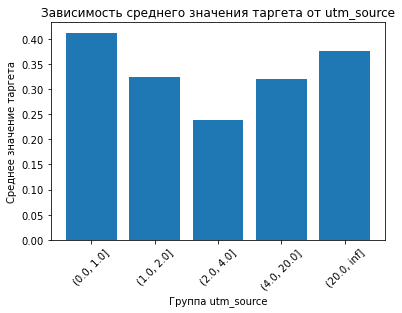

In [35]:
data_train['utm_source_bucket'] = pd.cut(data_train['utm_source'], 
                                    [0, 1, 2, 4, 20, float('Inf')])
price_target_dep = data_train.groupby('utm_source_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа utm_source')
plt.title('Зависимость среднего значения таргета от utm_source')
plt.show()

Разрыв между соседними бакетами наблюдается значительный: признак информативный. Наблюдается квадратичная зависимость с центром в 3.

## category_id

In [37]:
data_train['category_id'].nunique()

3945

In [38]:
data_train['category_id'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    102081.000000
mean       2001.889034
std        1773.911030
min         124.000000
1%          126.000000
5%          134.000000
10%         146.000000
25%         207.000000
50%        1500.000000
75%        3231.000000
90%        4680.000000
95%        5003.000000
99%        7095.000000
max        8120.000000
Name: category_id, dtype: float64

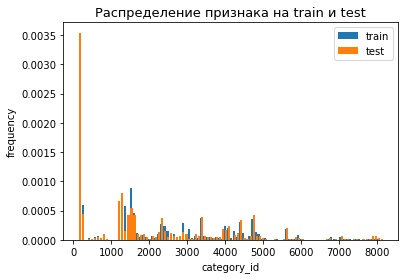

In [40]:
# distribution of category_id

plt.hist(data_train['category_id'], bins=100, rwidth=0.7, label='train', density=True)
plt.hist(data_test['category_id'], bins=100, rwidth=0.7, label='test', density=True)
plt.xlabel('category_id')
plt.ylabel('frequency')
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

Наблюдается резкий пик значений меньше 200 примерно.

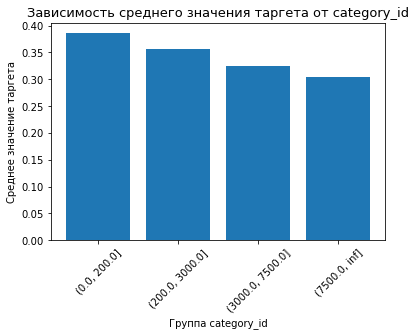

In [41]:
data_train['category_id_bucket'] = pd.cut(data_train['category_id'], 
                                    [0, 200, 3000, 7500, float('Inf')])
price_target_dep = data_train.groupby('category_id_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа category_id')
plt.title('Зависимость среднего значения таргета от category_id', fontsize=13)
plt.show()

Наблюдается линейная зависимость

## parent_id

In [42]:
data_train['parent_id'].nunique()

368

In [43]:
data_train['parent_id'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    104595.000000
mean       1961.047842
std        2161.814455
min         125.000000
1%          125.000000
5%          125.000000
10%         133.000000
25%         154.000000
50%        1290.000000
75%        2844.000000
90%        5673.000000
95%        6754.000000
99%        8058.000000
max        8172.000000
Name: parent_id, dtype: float64

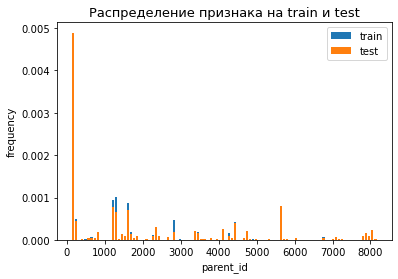

In [45]:
# distribution of parent_id

plt.hist(data_train['parent_id'], bins=100, rwidth=0.7, label='train', density=True)
plt.hist(data_test['parent_id'], bins=100, rwidth=0.7, label='test', density=True)
plt.xlabel('parent_id')
plt.ylabel('frequency')
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

Наблюдается резкий пик значений меньше 200 примерно.

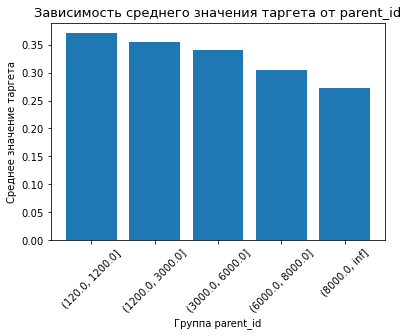

In [46]:
data_train['parent_id_bucket'] = pd.cut(data_train['parent_id'], 
                                    [0, 120, 1200, 3000, 6000, 8000, float('Inf')])
price_target_dep = data_train.groupby('parent_id_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа parent_id')
plt.title('Зависимость среднего значения таргета от parent_id', fontsize=13)
plt.show()

Наблюдается линейная зависимость

### pics_qty

In [47]:
data_train['pics_qty'].nunique()

34

In [48]:
data_train['pics_qty'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    104595.000000
mean          2.992437
std           2.975756
min           0.000000
1%            1.000000
5%            1.000000
10%           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
90%           6.000000
95%           8.000000
99%          15.000000
max          66.000000
Name: pics_qty, dtype: float64

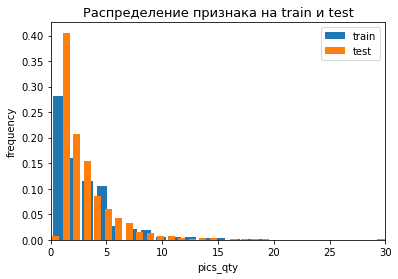

In [53]:
# distribution of pics_qty

plt.hist(data_train['pics_qty'], bins=50, rwidth=0.7, label='train', density=True)
plt.hist(data_test['pics_qty'], bins=50, rwidth=0.7, label='test', density=True)
plt.xlabel('pics_qty')
plt.ylabel('frequency')
plt.legend(loc="upper right")
plt.xlim((0, 30))
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

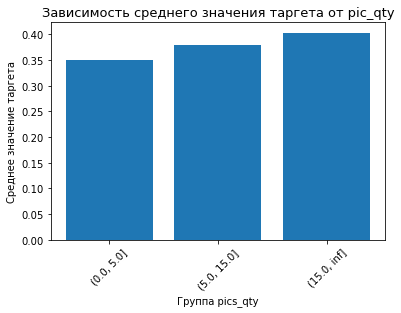

In [54]:
data_train['pics_qty_bucket'] = pd.cut(data_train['pics_qty'], 
                                    [0, 5, 15, float('Inf')])
price_target_dep = data_train.groupby('pics_qty_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа pics_qty')
plt.title('Зависимость среднего значения таргета от pic_qty', fontsize=13)
plt.show()

In [55]:
data_train['pics_qty_bucket'].value_counts()

(0.0, 5.0]     90874
(5.0, 15.0]    12429
(15.0, inf]      759
Name: pics_qty_bucket, dtype: int64

### pageview_duration_sec

In [56]:
data_train['pageview_duration_sec'].nunique()

2057

In [57]:
data_train['pageview_duration_sec'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    93914.000000
mean        74.104766
std        181.183408
min      -1882.500000
1%           6.500000
5%          11.000000
10%         14.000000
25%         20.500000
50%         33.000000
75%         61.000000
90%        138.000000
95%        275.500000
99%        800.870000
max      31730.000000
Name: pageview_duration_sec, dtype: float64

In [64]:
data_test['pageview_duration_sec'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    15476.000000
mean        68.536120
std        139.913426
min         -2.000000
1%           6.000000
5%          10.000000
10%         13.000000
25%         19.000000
50%         31.000000
75%         57.000000
90%        132.750000
95%        253.625000
99%        714.625000
max       6209.000000
Name: pageview_duration_sec, dtype: float64

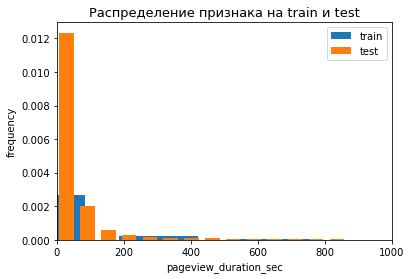

In [68]:
# distribution of pageview_duration_sec

plt.hist(data_train['pageview_duration_sec'], bins=100, rwidth=0.7, label='train', density=True)
plt.hist(data_test['pageview_duration_sec'], bins=100, rwidth=0.7, label='test', density=True)
plt.xlabel('pageview_duration_sec')
plt.ylabel('frequency')
plt.legend(loc="upper right")
plt.xlim((0, 1000))
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

Как видно из графика, в тесте наблюдается резкий пик при значениях меньше 50.

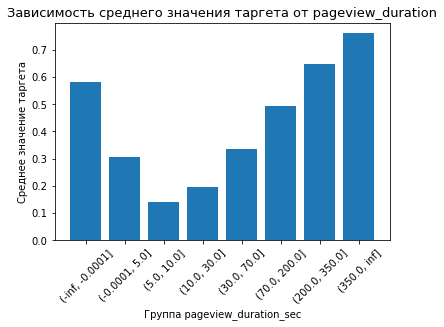

In [69]:
data_train['pageview_duration_sec_bucket'] = pd.cut(data_train['pageview_duration_sec'], 
                                    [-float('Inf'), -0.0001, 5, 10, 30, 70, 200, 350, float('Inf')])
price_target_dep = data_train.groupby('pageview_duration_sec_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа pageview_duration_sec')
plt.title('Зависимость среднего значения таргета от pageview_duration', fontsize=13)
plt.show()

In [70]:
data_train['pageview_duration_sec'].value_counts()

20.0      1755
19.0      1685
23.0      1658
21.0      1650
22.0      1622
          ... 
513.5        1
752.5        1
1298.0       1
1235.0       1
738.5        1
Name: pageview_duration_sec, Length: 2057, dtype: int64

In [71]:
data_train['pageview_duration_sec_bucket'].value_counts()

(10.0, 30.0]       38763
(30.0, 70.0]       31229
(70.0, 200.0]      13367
(350.0, inf]        3576
(5.0, 10.0]         3518
(200.0, 350.0]      2867
(-0.0001, 5.0]       582
(-inf, -0.0001]       12
Name: pageview_duration_sec_bucket, dtype: int64

Длительность просмотра не должна быть отрицательной, так что, скорее всего, отрицательные значения - просто ошибки. Но их мало, так что это не должно сильно мешать.

### page_type

In [72]:
data_train['page_type'].nunique()

22

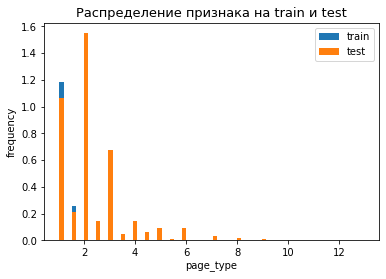

In [74]:
# distribution of page_type

plt.hist(data_train['page_type'], bins=50, rwidth=0.7, label='train', density=True)
plt.hist(data_test['page_type'], bins=50, rwidth=0.7, label='test', density=True)
plt.xlabel('page_type')
plt.ylabel('frequency')
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

In [75]:
data_train['page_type'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    103971.000000
mean          2.174116
std           1.261807
min           1.000000
1%            1.000000
5%            1.000000
10%           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
90%           3.500000
95%           5.000000
99%           7.000000
max          13.000000
Name: page_type, dtype: float64

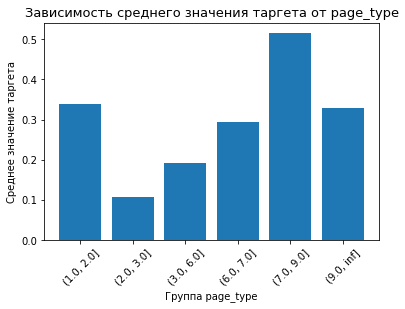

In [76]:
data_train['page_type_bucket'] = pd.cut(data_train['page_type'], 
                                    [1, 2, 3, 6, 7, 9, float('Inf')])
price_target_dep = data_train.groupby('page_type_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа page_type')
plt.title('Зависимость среднего значения таргета от page_type', fontsize=13)
plt.show()

Всего одна группа [7,9], где среднее значение таргета значительно превышает среднее значение тагргета, соответствующее распредлению классов.

### root_id

In [77]:
data_train['root_id'].nunique()

26

In [78]:
data_train['root_id'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    104595.000000
mean        864.969587
std         728.017309
min         124.000000
1%          124.000000
5%          124.000000
10%         124.000000
25%         153.000000
50%        1183.000000
75%        1481.000000
90%        1634.000000
95%        1634.000000
99%        3368.000000
max        6837.000000
Name: root_id, dtype: float64

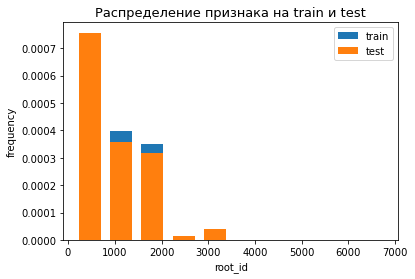

In [79]:
# distribution of root_id

plt.hist(data_train['root_id'], bins=10, rwidth=0.7, label='train', density=True)
plt.hist(data_test['root_id'], bins=10, rwidth=0.7, label='test', density=True)
plt.xlabel('root_id')
plt.ylabel('frequency')
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

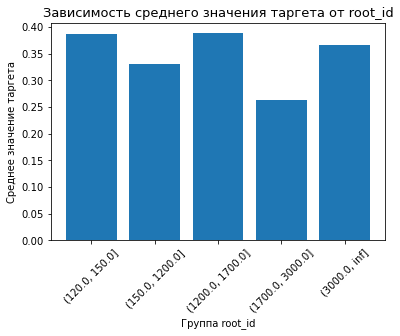

In [80]:
data_train['root_id_bucket'] = pd.cut(data_train['root_id'], 
                                    [0, 120, 150, 1200, 1700, 3000, float('Inf')])
price_target_dep = data_train.groupby('root_id_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа root_id')
plt.title('Зависимость среднего значения таргета от root_id', fontsize=13)
plt.show()

### model_id

In [81]:
data_train['model_id'].nunique()

46492

In [82]:
data_train['model_id'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    9.681900e+04
mean     1.193939e+07
std      1.021588e+07
min      1.234580e+05
1%       1.245481e+05
5%       1.618940e+05
10%      4.650250e+05
25%      2.260267e+06
50%      9.654422e+06
75%      1.928925e+07
90%      2.782663e+07
95%      2.982264e+07
99%      3.279142e+07
max      3.576997e+07
Name: model_id, dtype: float64

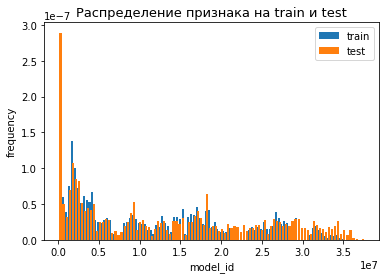

In [83]:
# distribution of model_id

plt.hist(data_train['model_id'], bins=100, rwidth=0.7, label='train', density=True)
plt.hist(data_test['model_id'], bins=100, rwidth=0.7, label='test', density=True)
plt.xlabel('model_id')
plt.ylabel('frequency')
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

Наблюдатеся резкий пик при значениях примерно меньше $10^{6}$

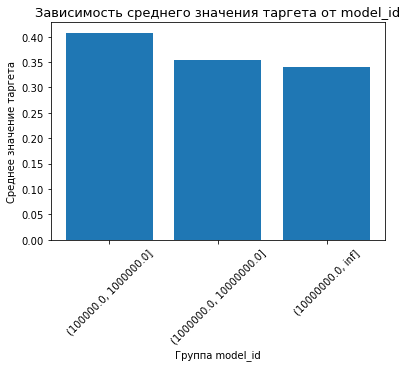

In [84]:
data_train['model_id_bucket'] = pd.cut(data_train['model_id'], 
                                    [0, 10**5, 10**6, 10**7, float('Inf')])
price_target_dep = data_train.groupby('model_id_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа model_id')
plt.title('Зависимость среднего значения таргета от model_id', fontsize=13)
plt.show()

### is_moderated

In [85]:
data_train['is_moderated'].nunique()

2

In [86]:
data_train['is_moderated'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    104595.000000
mean          0.951240
std           0.215366
min           0.000000
1%            0.000000
5%            1.000000
10%           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
90%           1.000000
95%           1.000000
99%           1.000000
max           1.000000
Name: is_moderated, dtype: float64

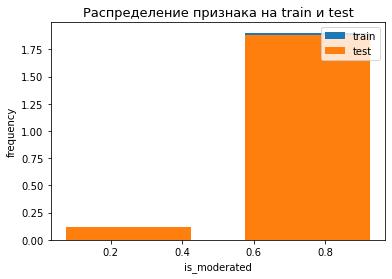

In [87]:
# distribution of is_moderated

plt.hist(data_train['is_moderated'], bins=2, rwidth=0.7, label='train', density=True)
plt.hist(data_test['is_moderated'], bins=2, rwidth=0.7, label='test', density=True)
plt.xlabel('is_moderated')
plt.ylabel('frequency')
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

В основном данный признак принимает значение 1, причем и на трейне, и на тесте.

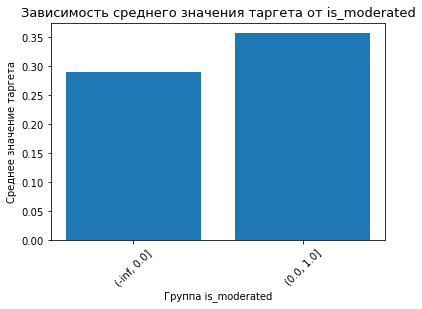

In [88]:
data_train['is_moderated_bucket'] = pd.cut(data_train['is_moderated'], 
                                    [-float('Inf'), 0, 1, float('Inf')])
price_target_dep = data_train.groupby('is_moderated_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа is_moderated')
plt.title('Зависимость среднего значения таргета от is_moderated', fontsize=13)
plt.show()

### rating_value

In [89]:
data_train['rating_value'].nunique()

10

In [90]:
data_train['rating_value'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    33741.000000
mean         4.648202
std          1.005058
min          1.000000
1%           1.000000
5%           3.000000
10%          4.000000
25%          4.000000
50%          5.000000
75%          5.000000
90%          5.000000
95%          5.000000
99%          9.000000
max         10.000000
Name: rating_value, dtype: float64

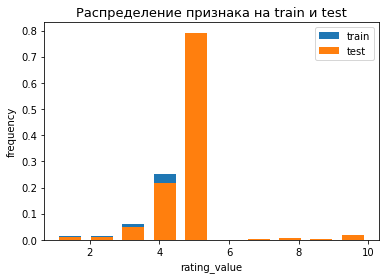

In [91]:
# distribution of rating_value

plt.hist(data_train['rating_value'], bins=10, rwidth=0.7, label='train', density=True)
plt.hist(data_test['rating_value'], bins=10, rwidth=0.7, label='test', density=True)
plt.xlabel('rating_value')
plt.ylabel('frequency')
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

Как и ожидается, наблюдается резкий пик в районе среднего значения рейтинга.

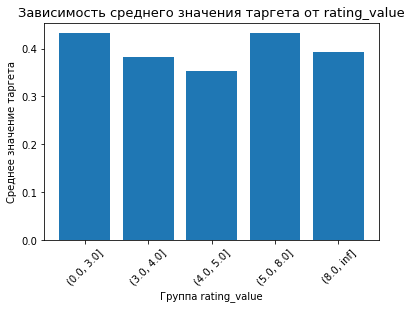

In [92]:
data_train['rating_value_bucket'] = pd.cut(data_train['rating_value'], 
                                    [0, 3, 4, 5, 8, float('Inf')])
price_target_dep = data_train.groupby('rating_value_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа rating_value')
plt.title('Зависимость среднего значения таргета от rating_value', fontsize=13)
plt.show()

### rating_count

In [93]:
data_train['rating_count'].nunique()

29

In [94]:
data_train['rating_count'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    51613.000000
mean         2.602464
std          3.757839
min          0.000000
1%           0.000000
5%           0.000000
10%          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
90%          7.000000
95%         10.000000
99%         19.000000
max         35.000000
Name: rating_count, dtype: float64

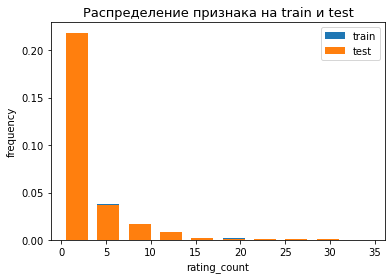

In [96]:
# distribution of rating_count

plt.hist(data_train['rating_count'], bins=10, rwidth=0.7, label='train', density=True)
plt.hist(data_test['rating_count'], bins=10, rwidth=0.7, label='test', density=True)
plt.xlabel('rating_count')
plt.ylabel('frequency')
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

Количество рейтингов убывает экспоненциально

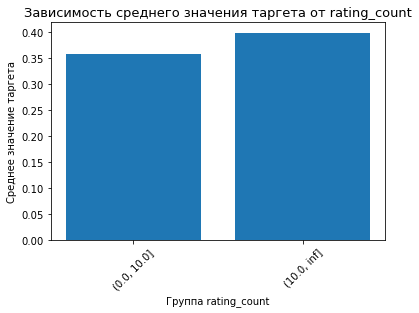

In [97]:
data_train['rating_count_bucket'] = pd.cut(data_train['rating_count'], 
                                    [0, 10, float('Inf')])
price_target_dep = data_train.groupby('rating_count_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа rating_count')
plt.title('Зависимость среднего значения таргета от rating_count', fontsize=13)
plt.show()

### product_in_sale

In [98]:
data_train.groupby('is_callcenter').count()['product_in_sale']

is_callcenter
0    62065
1    34014
Name: product_in_sale, dtype: int64

In [99]:
data_train['product_in_sale'].value_counts()

1.0    96079
Name: product_in_sale, dtype: int64

Можно предположить, что Nan означает, что товар не в сейле. Интересно, что звонков почти в 2 раза больше делают по товарам, на которые нет скидки, если под Nan понимать ее отсутствие.

### description_length

In [100]:
data_train['description_length'].nunique()

3106

In [101]:
data_train['description_length'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    104595.000000
mean        573.193661
std         843.566052
min           0.000000
1%            0.000000
5%            0.000000
10%           0.000000
25%           0.000000
50%         228.000000
75%         871.000000
90%        1708.000000
95%        2225.300000
99%        3596.000000
max       32767.000000
Name: description_length, dtype: float64

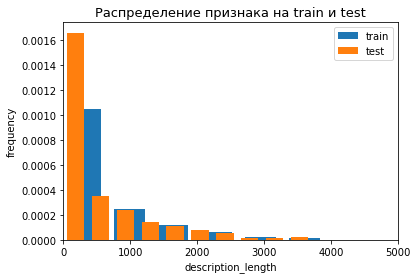

In [102]:
# distribution of description_length

plt.hist(data_train['description_length'], bins=50, rwidth=0.7, label='train', density=True)
plt.hist(data_test['description_length'], bins=50, rwidth=0.7, label='test', density=True)
plt.xlabel('description_length')
plt.ylabel('frequency')
plt.xlim((0, 5000))
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

Длина отзывов резко спадает с увеличением их длины.

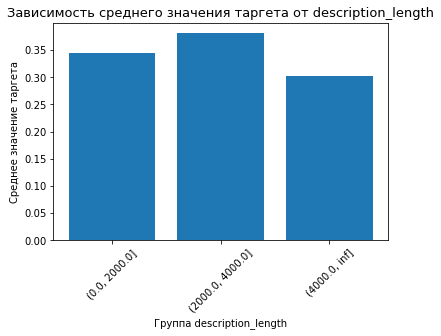

In [103]:
data_train['description_length_bucket'] = pd.cut(data_train['description_length'], 
                                    [0, 2000, 4000, float('Inf')])
price_target_dep = data_train.groupby('description_length_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа description_length')
plt.title('Зависимость среднего значения таргета от description_length', fontsize=13)
plt.show()

In [104]:
data_train.groupby('description_length_bucket')['is_callcenter'].mean()

description_length_bucket
(0.0, 2000.0]       0.344609
(2000.0, 4000.0]    0.380945
(4000.0, inf]       0.302961
Name: is_callcenter, dtype: float64

In [105]:
data_train['description_length_bucket'].value_counts()

(0.0, 2000.0]       57471
(2000.0, 4000.0]     6497
(4000.0, inf]         439
Name: description_length_bucket, dtype: int64

### goods_qty

In [106]:
data_train['goods_qty'].nunique()

114

In [107]:
data_train['goods_qty'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    104595.000000
mean         10.117482
std          18.143736
min           1.000000
1%            1.000000
5%            1.000000
10%           1.000000
25%           1.000000
50%           4.000000
75%          12.000000
90%          24.000000
95%          36.000000
99%          93.000000
max         285.000000
Name: goods_qty, dtype: float64

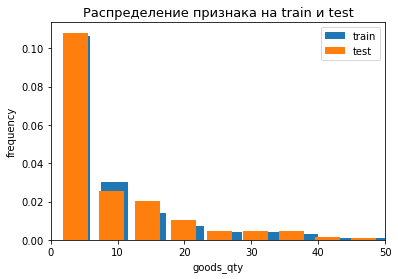

In [108]:
# distribution of goods_qty

plt.hist(data_train['goods_qty'], bins=50, rwidth=0.7, label='train', density=True)
plt.hist(data_test['goods_qty'], bins=50, rwidth=0.7, label='test', density=True)
plt.xlabel('goods_qty')
plt.ylabel('frequency')
plt.xlim((0, 50))
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

Значения качества товаров имеют резкий пик при низких значениях (меньше 5)

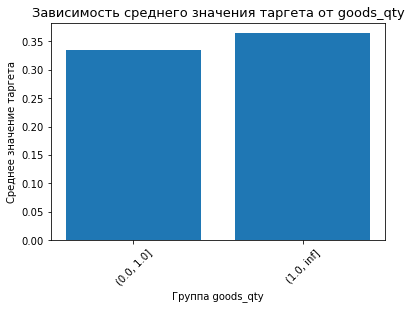

In [110]:
data_train['goods_qty_bucket'] = pd.cut(data_train['goods_qty'], 
                                    [0, 1, float('Inf')])
price_target_dep = data_train.groupby('goods_qty_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа goods_qty')
plt.title('Зависимость среднего значения таргета от goods_qty', fontsize=13)
plt.show()

### pageview_number

In [111]:
data_train['pageview_number'].nunique()

254

In [112]:
data_train['pageview_number'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    103971.000000
mean          8.118788
std          10.508665
min           1.000000
1%            1.000000
5%            1.000000
10%           1.500000
25%           2.000000
50%           5.000000
75%          10.000000
90%          18.000000
95%          26.000000
99%          50.500000
max         317.500000
Name: pageview_number, dtype: float64

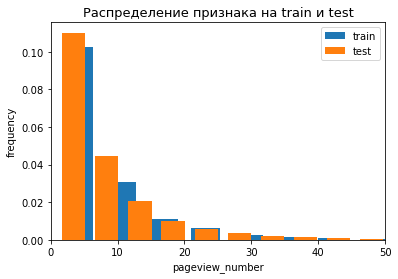

In [113]:
# distribution of pageview_number

plt.hist(data_train['pageview_number'], bins=50, rwidth=0.7, label='train', density=True)
plt.hist(data_test['pageview_number'], bins=50, rwidth=0.7, label='test', density=True)
plt.xlabel('pageview_number')
plt.ylabel('frequency')
plt.xlim((0, 50))
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

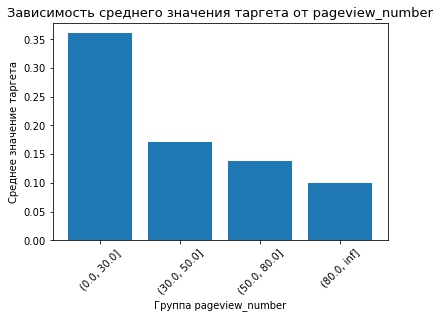

In [114]:
data_train['pageview_number_bucket'] = pd.cut(data_train['pageview_number'], 
                                    [0, 30, 50, 80, float('Inf')])
price_target_dep = data_train.groupby('pageview_number_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа pageview_number')
plt.title('Зависимость среднего значения таргета от pageview_number', fontsize=13)
plt.show()

### Date

### hour

In [115]:
data_train['hour'].nunique()

12

In [116]:
data_train['hour'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    104595.000000
mean         14.251446
std           3.128674
min           9.000000
1%            9.000000
5%           10.000000
10%          10.000000
25%          12.000000
50%          14.000000
75%          17.000000
90%          19.000000
95%          20.000000
99%          20.000000
max          20.000000
Name: hour, dtype: float64

In [117]:
data_train['hour'].value_counts()

13    10844
12    10839
11    10622
14    10516
15    10166
16     9733
10     8809
17     8711
18     7032
19     6203
20     6056
9      5064
Name: hour, dtype: int64

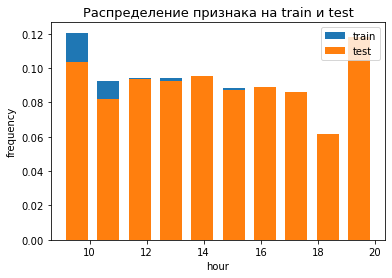

In [118]:
# distribution of hour

plt.hist(data_train['hour'], bins=10, rwidth=0.7, label='train', density=True)
plt.hist(data_test['hour'], bins=10, rwidth=0.7, label='test', density=True)
plt.xlabel('hour')
plt.ylabel('frequency')
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

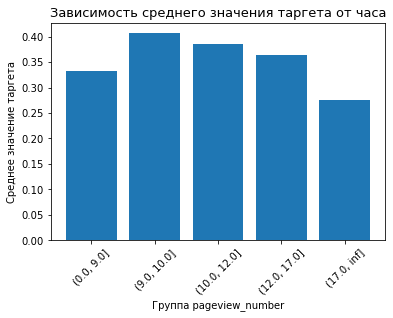

In [119]:
data_train['hour_bucket'] = pd.cut(data_train['hour'], 
                                    [0, 9, 10, 12, 17, float('Inf')])
price_target_dep = data_train.groupby('hour_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа pageview_number')
plt.title('Зависимость среднего значения таргета от часа', fontsize=13)
plt.show()

### day

In [120]:
data_train['day'].nunique()

31

In [121]:
data_train['day'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    104595.000000
mean         15.823988
std           8.838724
min           1.000000
1%            1.000000
5%            2.000000
10%           4.000000
25%           8.000000
50%          16.000000
75%          24.000000
90%          28.000000
95%          29.000000
99%          31.000000
max          31.000000
Name: day, dtype: float64

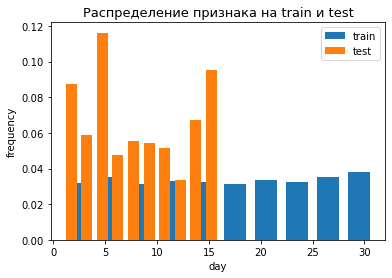

In [122]:
# distribution of day

plt.hist(data_train['day'], bins=10, rwidth=0.7, label='train', density=True)
plt.hist(data_test['day'], bins=10, rwidth=0.7, label='test', density=True)
plt.xlabel('day')
plt.ylabel('frequency')
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

Распредления в тесте и трейне разнятся: на тесте дни только до 15. Так что этот признак не будет очень информативным.

### dayofweek

In [123]:
data_train['dayofweek'].nunique()

7

In [124]:
data_train['dayofweek'].value_counts()

0    19036
1    18405
2    18265
3    17045
4    13723
6     9069
5     9052
Name: dayofweek, dtype: int64

In [125]:
data_train['dayofweek'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    104595.000000
mean          2.491859
std           1.875103
min           0.000000
1%            0.000000
5%            0.000000
10%           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
90%           5.000000
95%           6.000000
99%           6.000000
max           6.000000
Name: dayofweek, dtype: float64

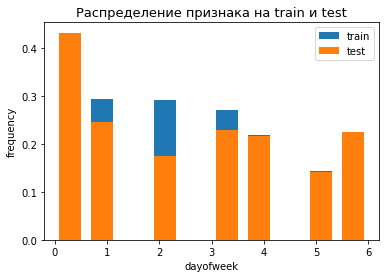

In [126]:
# distribution of dayofweek

plt.hist(data_train['dayofweek'], bins=10, rwidth=0.7, label='train', density=True)
plt.hist(data_test['dayofweek'], bins=10, rwidth=0.7, label='test', density=True)
plt.xlabel('dayofweek')
plt.ylabel('frequency')
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

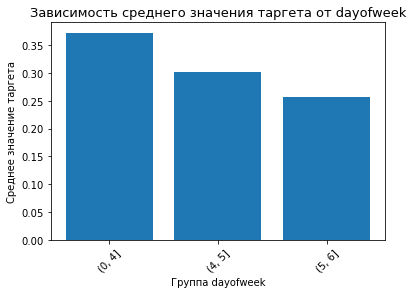

In [127]:
data_train['dayofweek_bucket'] = pd.cut(data_train['dayofweek'], 
                                    [0, 4, 5, 6])
price_target_dep = data_train.groupby('dayofweek_bucket')['is_callcenter'].mean()

plt.bar(price_target_dep.index.categories.astype(str), price_target_dep.values)
plt.xticks(rotation=45)
plt.ylabel('Среднее значение таргета')
plt.xlabel('Группа dayofweek')
plt.title('Зависимость среднего значения таргета от dayofweek', fontsize=13)
plt.show()

### month

In [128]:
data_train['month'].nunique()

3

In [129]:
data_train['month'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    104595.000000
mean          7.936450
std           4.997627
min           1.000000
1%            1.000000
5%            1.000000
10%           1.000000
25%           1.000000
50%          11.000000
75%          12.000000
90%          12.000000
95%          12.000000
99%          12.000000
max          12.000000
Name: month, dtype: float64

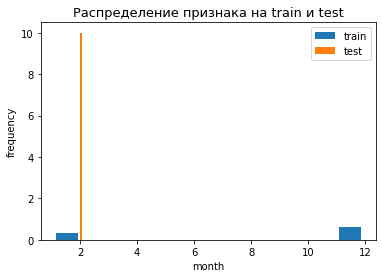

In [131]:
# distribution of month

plt.hist(data_train['month'], bins=10, rwidth=0.7, label='train', density=True)
plt.hist(data_test['month'], bins=10, rwidth=0.7, label='test', density=True)
plt.xlabel('month')
plt.ylabel('frequency')
plt.legend(loc="upper right")
plt.title('Распределение признака на train и test', fontsize=13)
plt.show()

На тесте дан 2-ой месяц, тогда как на трейне 2 и 12. Признак неинформативный.

### Посмотрим на корреляцию признаков 

In [18]:
import seaborn as sns

corr = data_train[columns_train].corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/Users/liliasergeenkova/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/liliasergeenkova/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,description_length,goods_qty,is_moderated,parent_id,pics_qty,rating_count,rating_value,root_id,utm_medium,utm_source,sessionkey_id,page_type,pageview_number,pageview_duration_sec,category_id,model_id,good_id,price,product_in_sale,day,month,year,hour,dayofweek,day_model,month_model,year_model,hour_model,dayofweek_model,is_callcenter
description_length,1.00,-0.07,0.06,0.12,0.13,0.05,0.01,0.08,-0.01,-0.01,-0.03,-0.01,-0.00,0.00,0.03,-0.19,-0.06,-0.01,nan,-0.01,0.02,-0.02,-0.00,-0.00,-0.02,0.04,-0.25,0.02,-0.00,-0.00
goods_qty,-0.07,1.00,0.10,-0.16,0.41,0.11,0.02,-0.21,0.09,0.05,0.01,0.05,-0.02,0.01,-0.20,0.02,0.09,0.11,nan,0.00,-0.01,0.01,-0.00,0.02,0.05,-0.08,0.03,0.02,-0.01,0.01
is_moderated,0.06,0.10,1.00,-0.11,0.14,0.02,0.01,-0.13,0.07,0.02,-0.01,-0.04,-0.01,0.01,-0.15,-0.21,-0.04,0.05,nan,-0.01,0.01,-0.01,0.00,0.00,0.01,-0.05,-0.20,-0.01,-0.00,0.03
parent_id,0.12,-0.16,-0.11,1.00,0.11,-0.00,-0.03,0.44,-0.05,-0.02,0.01,-0.01,0.05,-0.01,0.56,0.05,-0.04,-0.10,nan,0.01,-0.01,0.01,0.00,-0.00,-0.02,0.03,0.05,0.02,0.01,-0.03
pics_qty,0.13,0.41,0.14,0.11,1.00,0.26,-0.02,0.04,0.05,0.02,0.00,-0.02,-0.01,0.01,-0.02,-0.08,0.04,0.04,nan,-0.00,-0.00,0.01,0.00,0.02,-0.01,-0.05,-0.10,0.03,-0.01,0.02
rating_count,0.05,0.11,0.02,-0.00,0.26,1.00,-0.03,-0.01,-0.00,-0.01,-0.02,-0.00,-0.01,-0.00,0.07,-0.07,-0.10,-0.06,nan,-0.01,0.01,-0.01,-0.00,0.01,0.04,0.02,-0.06,0.03,-0.03,0.00
rating_value,0.01,0.02,0.01,-0.03,-0.02,-0.03,1.00,-0.06,0.02,0.01,0.05,0.03,0.02,-0.03,-0.03,-0.01,0.02,0.07,nan,0.03,-0.04,0.04,0.01,0.00,0.05,0.02,-0.09,0.00,0.05,-0.03
root_id,0.08,-0.21,-0.13,0.44,0.04,-0.01,-0.06,1.00,-0.01,-0.03,-0.03,-0.01,0.04,-0.00,0.23,0.07,-0.03,-0.09,nan,-0.01,0.02,-0.02,0.00,-0.02,-0.03,0.07,0.07,-0.00,0.03,-0.01
utm_medium,-0.01,0.09,0.07,-0.05,0.05,-0.00,0.02,-0.01,1.00,0.27,0.04,0.10,0.03,-0.01,-0.09,0.03,0.05,0.06,nan,0.02,-0.03,0.03,0.01,0.01,-0.00,-0.01,0.03,0.02,-0.00,-0.06
utm_source,-0.01,0.05,0.02,-0.02,0.02,-0.01,0.01,-0.03,0.27,1.00,0.00,0.03,-0.01,-0.00,-0.03,0.03,0.02,0.03,nan,0.01,0.00,-0.00,-0.00,0.01,-0.00,-0.01,0.02,0.01,-0.00,-0.02


Наибольший по модулю коэффициент корреляции между таргетом и page_type, pageview_number, pageview_duration_sec.
Также обратим внимание, на признаки, между которыми большая корреляция: по ним можно будет потом делать selection.

### Построим градиентный бустинг с дефолтными параметрами и посмотрим на важность фичей

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier


model = LGBMClassifier()
X_train = data_train.loc[:, columns_train != 'is_callcenter']
y_train = data_train.loc[:, 'is_callcenter']
    
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

model.fit(X_train_1, y_train_1)
y_pred = model.predict_proba(X_test_1)
    
print('Roc_auc with default parameters:', roc_auc_score(y_test_1, y_pred[:, 1]))

Roc_auc with default parameters: 0.8132251928358755


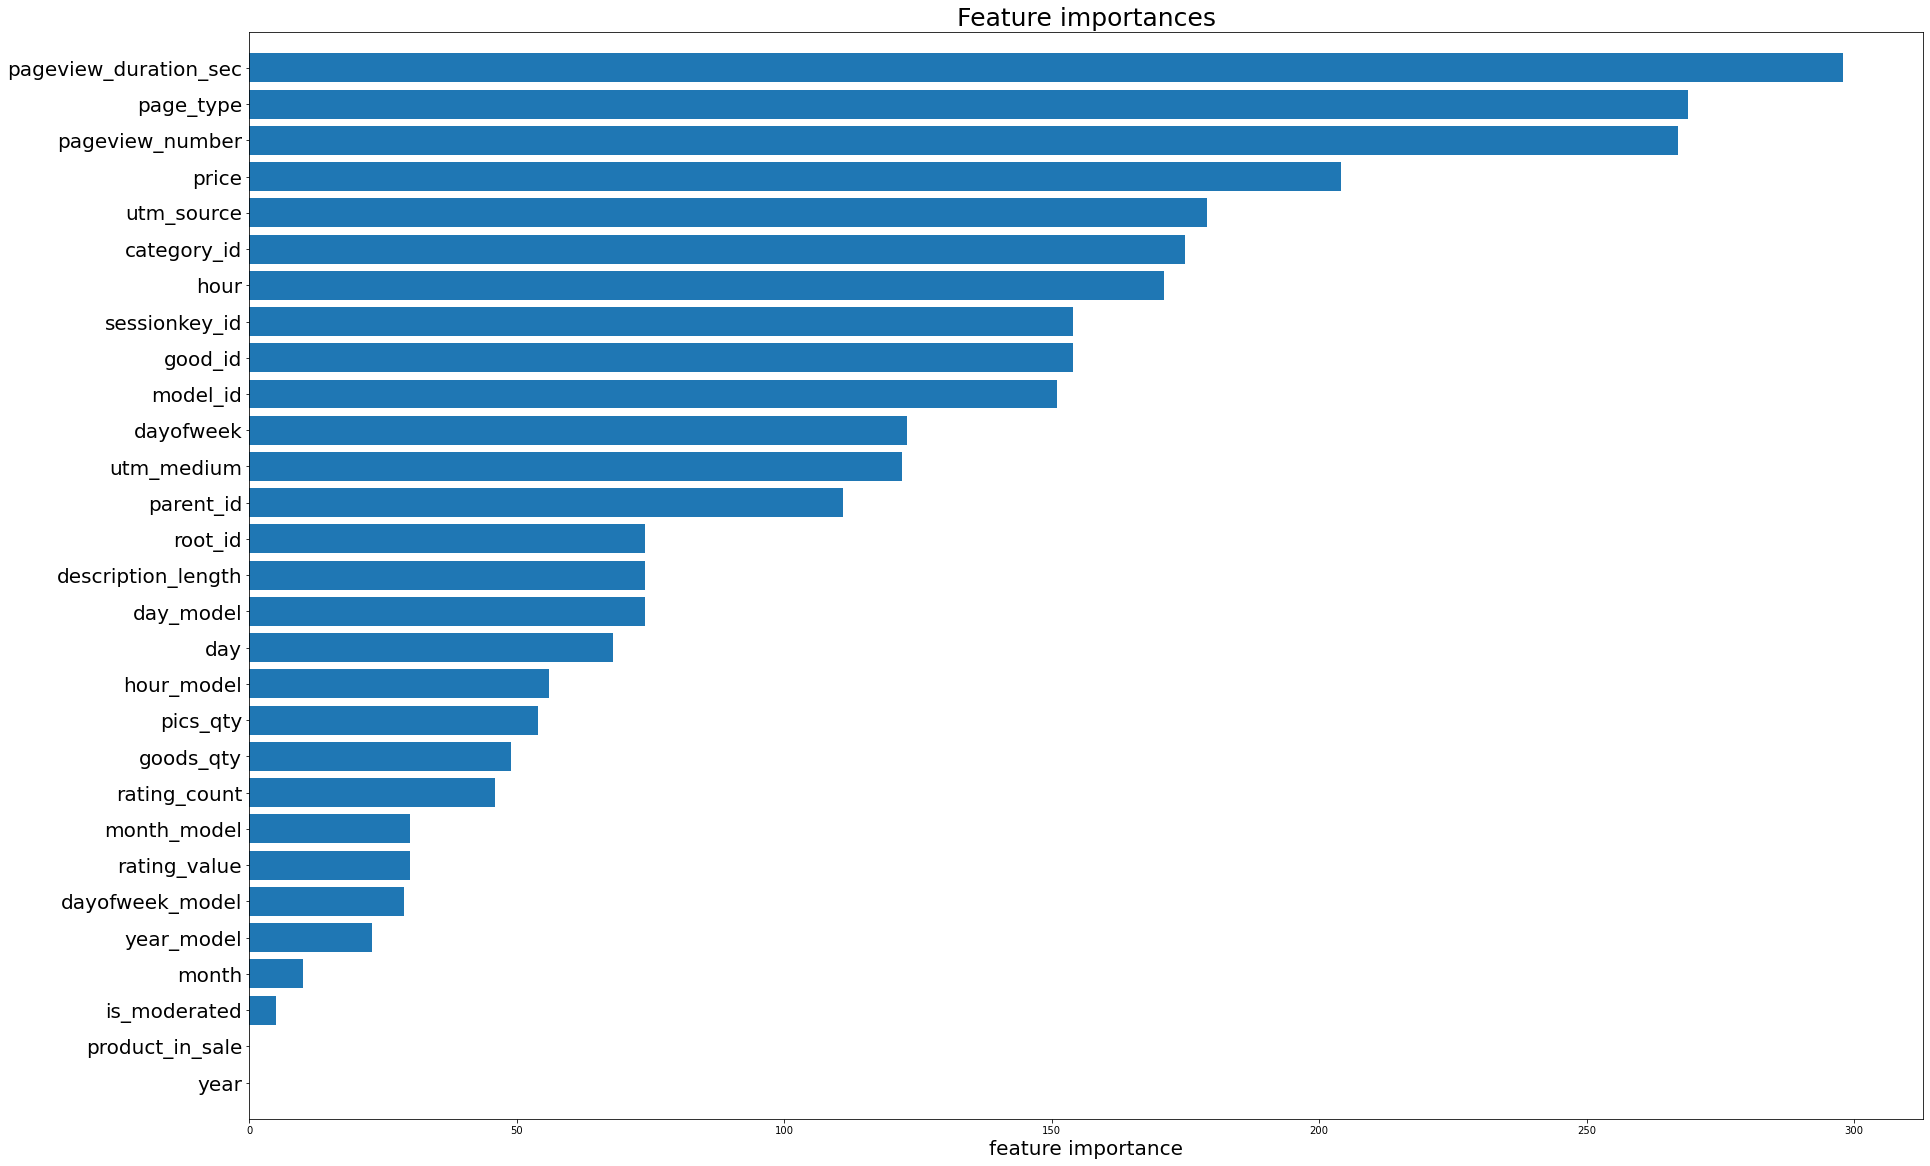

In [19]:
# Feature importances

imp_ind = np.argsort(model.feature_importances_)

plt.figure(figsize=(30,20))
plt.title("Feature importances", fontsize=25)
plt.barh(range(X_train_1.shape[1]), model.feature_importances_[imp_ind], align="center")

plt.yticks(range(X_train_1.shape[1]), X_train_1.columns[imp_ind], fontsize=20)
plt.xlabel('feature importance', fontsize=20)
plt.ylim([-1, X_train_1.shape[1]])
plt.show()

### Выводы

Судя по предварительному анализу, наиболее важными фичами будут время просмотра страницы, тип страницы, количество просмотров, цена, utm, категория товара, час, день недели. Также, конечно при агрегации с таблицей webstat следует рассматривать различные статистические характеристики. 

### Улучшение скора представлено в следующем ноутубуке